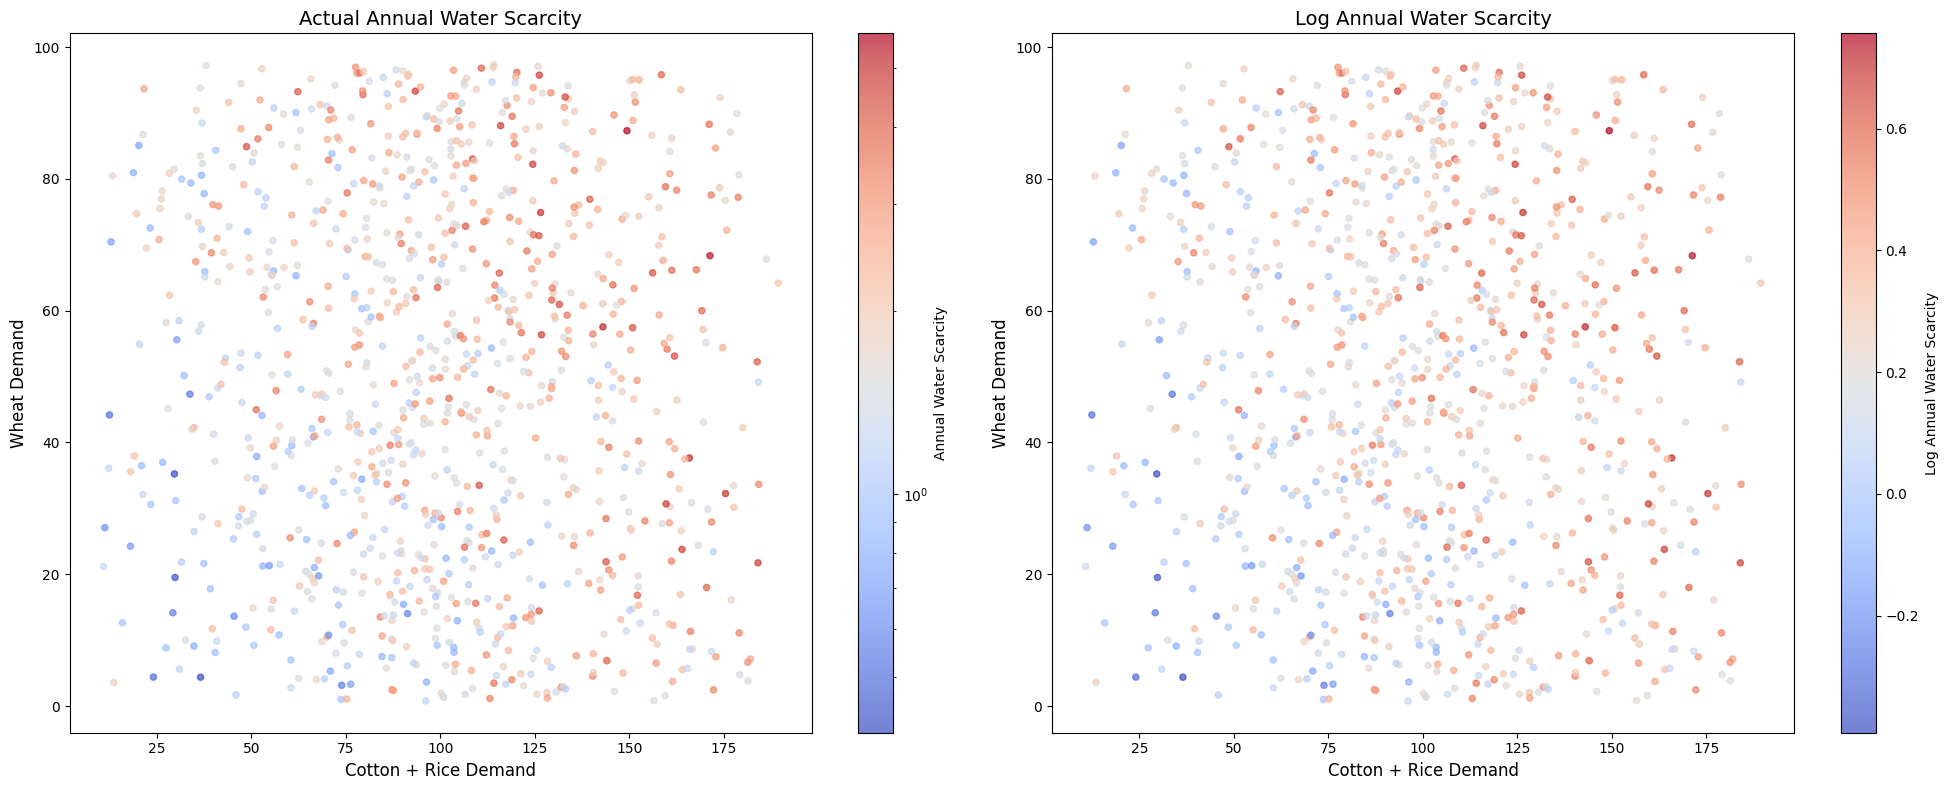

Plot saved as ./Case3_checks_all_7_PP/6. results\demand_vs_scarcity_actual_and_log.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.colors import LogNorm

def plot_demand_vs_scarcity(csv_file, output_folder):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Calculate Cotton+Rice demand
    df['Cotton_Rice_Demand'] = df['Cotton_Demand'] + df['Rice_Demand']

    # Calculate log of annual water scarcity
    df['Log_Annual_Scarcity'] = np.log10(df['Annual_Scarcity'])

    # Create the scatter plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))


    # Then in your plotting code, use LogNorm() directly
    scatter1 = ax1.scatter(df['Cotton_Rice_Demand'], df['Wheat_Demand'], 
                       c=df['Annual_Scarcity'], cmap='coolwarm', 
                       norm=LogNorm(), s=20, alpha=0.7)

    # # Plot with actual scarcity values
    # scatter1 = ax1.scatter(df['Cotton_Rice_Demand'], df['Wheat_Demand'], 
    #                        c=df['Annual_Scarcity'], cmap='coolwarm', 
    #                        norm=plt.LogNorm(), s=20, alpha=0.7)
    ax1.set_xlabel('Cotton + Rice Demand', fontsize=12)
    ax1.set_ylabel('Wheat Demand', fontsize=12)
    ax1.set_title('Actual Annual Water Scarcity', fontsize=14)
    cbar1 = plt.colorbar(scatter1, ax=ax1)
    cbar1.set_label('Annual Water Scarcity', fontsize=10)

    # Plot with log scarcity values
    scatter2 = ax2.scatter(df['Cotton_Rice_Demand'], df['Wheat_Demand'], 
                           c=df['Log_Annual_Scarcity'], cmap='coolwarm', 
                           s=20, alpha=0.7)
    ax2.set_xlabel('Cotton + Rice Demand', fontsize=12)
    ax2.set_ylabel('Wheat Demand', fontsize=12)
    ax2.set_title('Log Annual Water Scarcity', fontsize=14)
    cbar2 = plt.colorbar(scatter2, ax=ax2)
    cbar2.set_label('Log Annual Water Scarcity', fontsize=10)

    # Improve layout
    plt.tight_layout()

    # Save the plot
    output_file = os.path.join(output_folder, 'demand_vs_scarcity_actual_and_log.png')
    #plt.savefig(output_file, dpi=300, bbox_inches='tight')
    #plt.close()
    plt.show()

    print(f"Plot saved as {output_file}")



results_folder = './Case3_checks_all_7_PP/6. results'  # Update this path to your results folder
csv_file = os.path.join(results_folder, 'complete_results.csv')

# Create the plot
plot_demand_vs_scarcity(csv_file, results_folder)

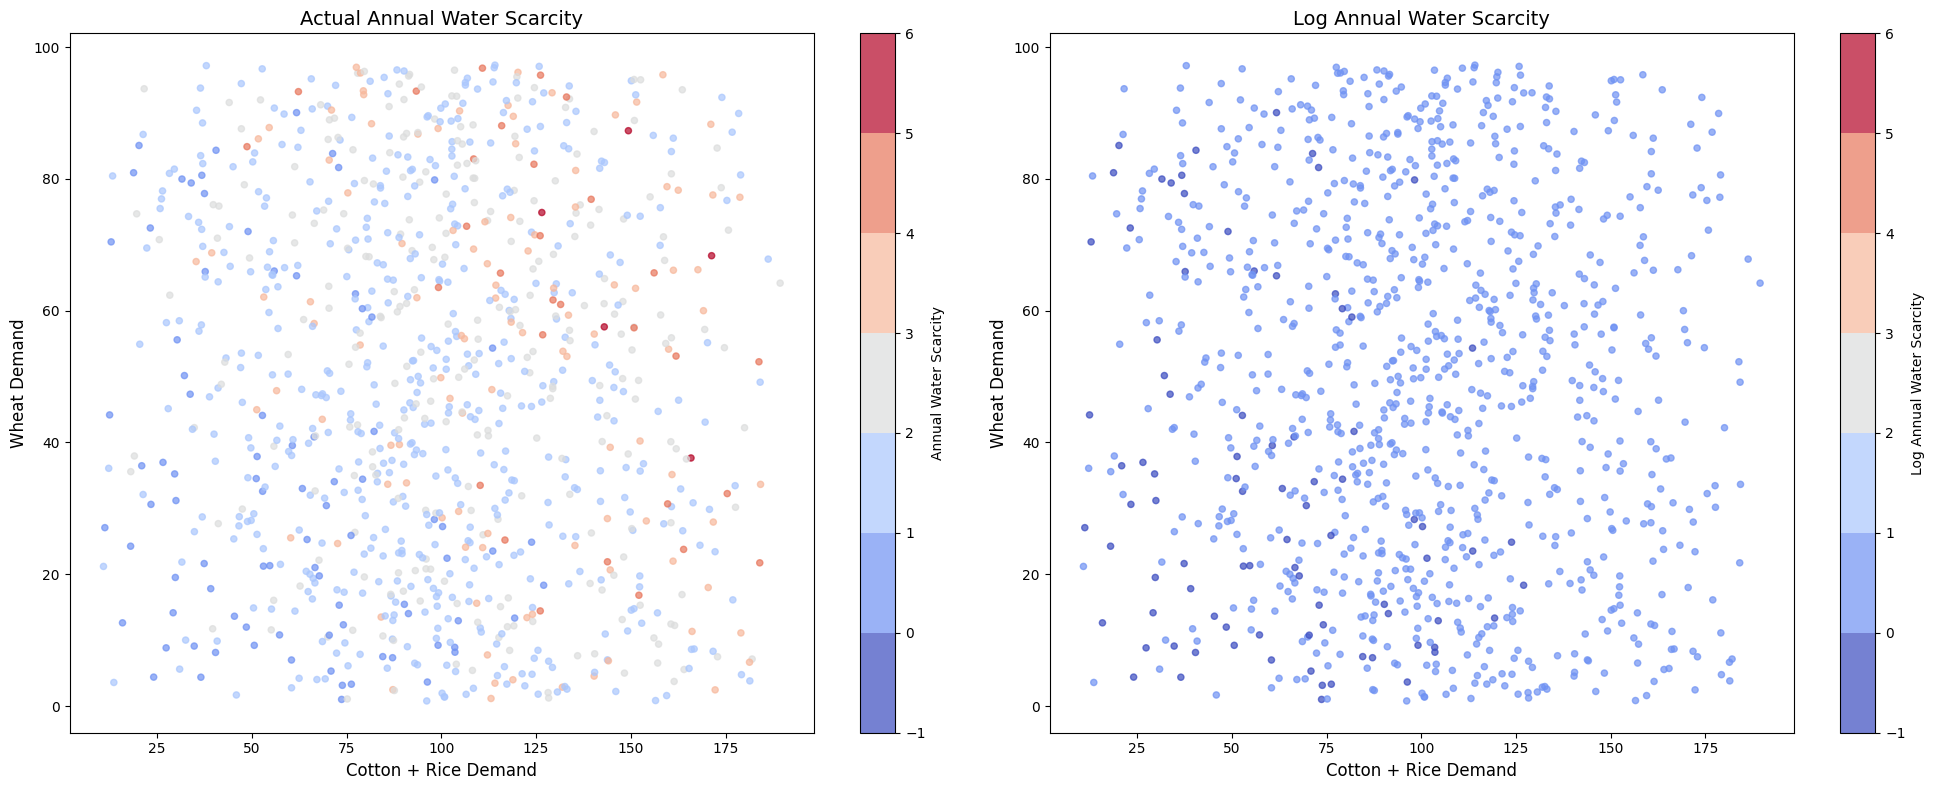

Plot saved as ./Case3_checks_all_7_PP/6. results\demand_vs_scarcity_actual_and_log.png


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.colors import LogNorm, BoundaryNorm

def plot_demand_vs_scarcity(csv_file, output_folder):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Calculate Cotton+Rice demand
    df['Cotton_Rice_Demand'] = df['Cotton_Demand'] + df['Rice_Demand']

    # Create the scatter plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Define linear boundaries for actual values from -1 to 6
    boundaries_linear = np.arange(-1, 7)  # -1 to 6
    cmap = plt.get_cmap('coolwarm')
    norm_linear = BoundaryNorm(boundaries_linear, ncolors=cmap.N, clip=True)

    # Scatter plot with discrete color bar for actual scarcity values
    scatter1 = ax1.scatter(df['Cotton_Rice_Demand'], df['Wheat_Demand'],
                           c=df['Annual_Scarcity'], cmap=cmap,
                           norm=norm_linear, s=20, alpha=0.7)
    ax1.set_xlabel('Cotton + Rice Demand', fontsize=12)
    ax1.set_ylabel('Wheat Demand', fontsize=12)
    ax1.set_title('Actual Annual Water Scarcity', fontsize=14)
    cbar1 = plt.colorbar(scatter1, ax=ax1, ticks=boundaries_linear)
    cbar1.set_label('Annual Water Scarcity', fontsize=10)

    # Define logarithmic boundaries for log values from -1 to 6
    boundaries_log = np.arange(-1, 7)  # -1 to 6
    norm_log = BoundaryNorm(boundaries_log, ncolors=cmap.N, clip=True)

    # Plot with log scarcity values
    scatter2 = ax2.scatter(df['Cotton_Rice_Demand'], df['Wheat_Demand'],
                           c=np.log10(df['Annual_Scarcity']), cmap=cmap,
                           norm=norm_log, s=20, alpha=0.7)
    ax2.set_xlabel('Cotton + Rice Demand', fontsize=12)
    ax2.set_ylabel('Wheat Demand', fontsize=12)
    ax2.set_title('Log Annual Water Scarcity', fontsize=14)
    cbar2 = plt.colorbar(scatter2, ax=ax2, ticks=boundaries_log)
    cbar2.set_label('Log Annual Water Scarcity', fontsize=10)

    # Improve layout and display plot
    plt.tight_layout()
    plt.show()

    # Save the plot
    output_file = os.path.join(output_folder, 'demand_vs_scarcity_actual_and_log.png')
    # Uncomment below to save the file
    # plt.savefig(output_file, dpi=300, bbox_inches='tight')
    # plt.close()
    print(f"Plot saved as {output_file}")

results_folder = './Case3_checks_all_7_PP/6. results'  # Update this path to your results folder
csv_file = os.path.join(results_folder, 'complete_results.csv')

# Create the plot
plot_demand_vs_scarcity(csv_file, results_folder)


In [6]:
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio
import numpy as np

def create_PP_log(data, output_file):
    # Calculate log of annual scarcity
    data['Log_Annual_Scarcity'] = np.log10(data['Annual_Scarcity'])

    # Prepare the data
    plot_data = data[['Cotton_Demand', 'Rice_Demand', 'Wheat_Demand', 'Sugarcane_Demand', 'Miscellaneous_Demand',
                      'Log_Annual_Scarcity', 'Variability', 'Storage_Adequacy_Points']]

    # Define dimension names and ranges
    dimensions = [
        dict(label='Cotton Demand', values=plot_data['Cotton_Demand']),
        dict(label='Rice Demand', values=plot_data['Rice_Demand']),
        dict(label='Wheat Demand', values=plot_data['Wheat_Demand']),
        dict(label='Sugarcane Demand', values=plot_data['Sugarcane_Demand']),
        dict(label='Misc. Demand', values=plot_data['Miscellaneous_Demand']),
        dict(label='Log Annual Scarcity', values=plot_data['Log_Annual_Scarcity']),
        dict(label='Variability', values=plot_data['Variability']),
        dict(label='Storage Adequacy', values=plot_data['Storage_Adequacy_Points'])
    ]

    # Create color scale
    color_scale = [[0, 'red'], [0.5, 'yellow'], [1, 'blue']]

    # Create the parallel coordinates plot
    fig = go.Figure(data=
        go.Parcoords(
            line = dict(color = plot_data['Storage_Adequacy_Points'],
                        colorscale = color_scale),
            dimensions = dimensions
        )
    )

    # Update the layout
    fig.update_layout(
        title='Parallel Coordinates Plot of Demand, Metrics, and Log Annual Scarcity',
        plot_bgcolor = 'white',
        paper_bgcolor = 'white'
    )

    # Save the plot as an interactive HTML file
    pio.write_html(fig, file=output_file, auto_open=False)
    print(f"Parallel coordinates plot saved as {output_file}")

# Load your data
results_folder = './Case3_checks_all_7_PP/6. results'  # Update this path to your results folder
csv_file = os.path.join(results_folder, 'complete_results.csv')
data = pd.read_csv(csv_file)

# Create the parallel coordinates plot
output_file ='parallel_coordinates_plot_with_log_scarcity.html'
create_PP_log(data, output_file)

Parallel coordinates plot saved as parallel_coordinates_plot_with_log_scarcity.html


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from itertools import combinations

def plot_crop_combinations(csv_file, output_folder):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # List of crop demands and metrics to plot
    crops = ['Cotton_Demand', 'Rice_Demand', 'Wheat_Demand', 'Sugarcane_Demand', 'Miscellaneous_Demand']
    metrics = ['Input_Amplitude', 'Input_lambda', 'Annual_Scarcity', 'Variability', 
               'Surplus_Capacity', 'Deficit_Severity', 'Storage_Adequacy']

    # Create all possible combinations of crops
    crop_combinations = list(combinations(crops, 2))

    # Create a custom colormap for Storage_Adequacy_Points
    cmap_sap = plt.cm.colors.ListedColormap(['red', 'yellow', 'blue'])
    bounds_sap = [0, 1, 2]
    norm_sap = plt.cm.colors.BoundaryNorm(bounds_sap, cmap_sap.N)

    # Plot for each combination and metric
    for crop1, crop2 in crop_combinations:
        fig, axs = plt.subplots(2, 4, figsize=(20, 10))
        fig.suptitle(f'{crop1} vs {crop2}', fontsize=16)
        axs = axs.flatten()

        for i, metric in enumerate(metrics + ['Storage_Adequacy_Points']):
            ax = axs[i]
            if metric == 'Storage_Adequacy_Points':
                scatter = ax.scatter(df[crop1], df[crop2], c=df[metric], cmap=cmap_sap, norm=norm_sap, alpha=0.7)
            else:
                scatter = ax.scatter(df[crop1], df[crop2], c=df[metric], cmap='coolwarm', alpha=0.7)
            
            ax.set_xlabel(crop1)
            ax.set_ylabel(crop2)
            ax.set_title(metric)
            
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label(metric)

        plt.tight_layout()
        output_file = os.path.join(output_folder, f'{crop1}_vs_{crop2}.png')
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        plt.close()
        

        print(f"Plot saved as {output_file}")

# Set the paths

output_folder = os.path.join(results_folder, 'crop_demand_plots')

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create the plots
plot_crop_combinations(csv_file, output_folder)

Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots\Cotton_Demand_vs_Rice_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots\Cotton_Demand_vs_Wheat_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots\Cotton_Demand_vs_Sugarcane_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots\Cotton_Demand_vs_Miscellaneous_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots\Rice_Demand_vs_Wheat_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots\Rice_Demand_vs_Sugarcane_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots\Rice_Demand_vs_Miscellaneous_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots\Wheat_Demand_vs_Sugarcane_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots\Wheat_Demand_vs_Miscellaneous_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plo

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from itertools import combinations
from matplotlib.colors import BoundaryNorm, ListedColormap

def plot_crop_combinations(csv_file, output_folder):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # List of crop demands and metrics to plot
    crops = ['Cotton_Demand', 'Rice_Demand', 'Wheat_Demand', 'Sugarcane_Demand', 'Miscellaneous_Demand']
    metrics = ['Input_Amplitude', 'Input_lambda', 'Annual_Scarcity', 'Variability', 
               'Surplus_Capacity', 'Deficit_Severity', 'Storage_Adequacy_Points']

    # Create all possible combinations of crops
    crop_combinations = list(combinations(crops, 2))

    # Define custom color scales
    color_scales = {
        'Input_Amplitude': {'bounds': [0.4, 0.8, 1.2, 1.8], 'cmap': plt.cm.coolwarm},
        'Input_lambda': {'bounds': [0, 0.5, 1], 'cmap': plt.cm.coolwarm},
        'Annual_Scarcity': {'bounds': [-1, 0, 1, 2, 3, 4, 5], 'cmap': plt.cm.coolwarm},
        'Variability': {'cmap': plt.cm.coolwarm},
        'Surplus_Capacity': {'cmap': plt.cm.coolwarm},
        'Deficit_Severity': {'cmap': plt.cm.coolwarm},
        'Storage_Adequacy_Points': {'colors': ['red', 'yellow', 'blue']}
    }

    # Plot for each combination and metric
    for crop1, crop2 in crop_combinations:
        fig, axs = plt.subplots(2, 4, figsize=(20, 10))
        fig.suptitle(f'{crop1} vs {crop2}', fontsize=16)
        axs = axs.flatten()

        for i, metric in enumerate(metrics):
            ax = axs[i]
            
            if metric == 'Storage_Adequacy_Points':
                for j, color in enumerate(color_scales[metric]['colors']):
                    mask = df[metric] == j
                    ax.scatter(df.loc[mask, crop1], df.loc[mask, crop2], c=color, label=str(j), alpha=0.7)
                ax.legend(title='Storage Adequacy Points', loc='best')
            elif 'bounds' in color_scales[metric]:
                norm = BoundaryNorm(color_scales[metric]['bounds'], color_scales[metric]['cmap'].N)
                scatter = ax.scatter(df[crop1], df[crop2], c=df[metric], cmap=color_scales[metric]['cmap'], norm=norm, alpha=0.7)
                plt.colorbar(scatter, ax=ax, label=metric)
            else:
                scatter = ax.scatter(df[crop1], df[crop2], c=df[metric], cmap=color_scales[metric]['cmap'], alpha=0.7)
                plt.colorbar(scatter, ax=ax, label=metric)
            
            ax.set_xlabel(crop1)
            ax.set_ylabel(crop2)
            ax.set_title(metric)

        # Remove the last subplot
        fig.delaxes(axs[-1])

        plt.tight_layout()
        output_file = os.path.join(output_folder, f'{crop1}_vs_{crop2}.png')
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        plt.close()

        print(f"Plot saved as {output_file}")


output_folder = os.path.join(results_folder, 'crop_demand_plots_fix')

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create the plots
plot_crop_combinations(csv_file, output_folder)

Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots_fix\Cotton_Demand_vs_Rice_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots_fix\Cotton_Demand_vs_Wheat_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots_fix\Cotton_Demand_vs_Sugarcane_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots_fix\Cotton_Demand_vs_Miscellaneous_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots_fix\Rice_Demand_vs_Wheat_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots_fix\Rice_Demand_vs_Sugarcane_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots_fix\Rice_Demand_vs_Miscellaneous_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots_fix\Wheat_Demand_vs_Sugarcane_Demand.png
Plot saved as ./Case3_checks_all_7_PP/6. results\crop_demand_plots_fix\Wheat_Demand_vs_Miscellaneous_Demand.png
Plot saved as ./Case3_checks